# Logistic regression

## 1.逻辑斯蒂回归模型
### 1.1 逻辑斯蒂分布
定义: 设X是连续随机变量，X服从逻辑斯蒂分布是指X具有以下分布函数和密度函数：  
$$ F(x)=P(X \le x)=\dfrac{1}{1+e^{-(x-\mu)/ \gamma}}$$  
$$ f(x)=F'(x)=\dfrac{e^{-(x-\mu)/ \gamma}}{\gamma (1+e^{-(x-\mu)/ \gamma})^2}$$
其中，$\mu$为位置参数，$\gamma$为形状参数。  
逻辑斯蒂分布的密度函数f(x)和分布函数F(x)的图形如下：  
分布函数属于逻辑斯蒂函数，其图形是一条S形曲线(sigmoid curve)。该曲线以点$(\mu,\dfrac{1}{2})$为中心对称，即满足：  
$$F(-x+\mu)-\dfrac{1}{2}=F(x+\mu)+\dfrac{1}{2}$$
曲线在中心附近增长速度较快，在两端增长速度较慢。形状参数$\gamma$的值越小，曲线在中心线附近增长的越快。  

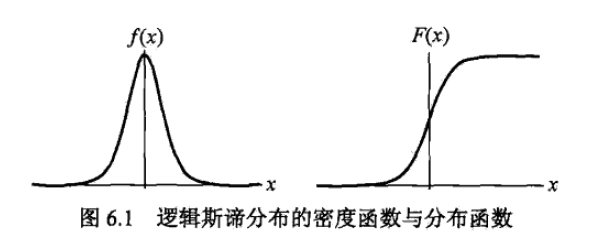

In [1]:
from IPython.display import Image
Image("/Users/shangshuhan/practice/3.png")

### 1.2 二项逻辑斯蒂回归模型
二项逻辑斯蒂回归模型是一种分类模型，由条件概率分布$P(Y|X)$表示，形式为参数化的逻辑斯蒂分布。这里，随机变量X取值为实数，随机变量Y取值为1或0。

- ###  logistic function的定义  

logistic函数是有意义的，因为当输入任何实值t,($t\in R$),输出值会在0-1之间，可以作为概率解释。  
标准logstic函数定义如下：
$$\delta(t)=\dfrac{e^t}{e^t+1}=\dfrac{1}{1+e^{-t}}$$
导数为：  
$$\dfrac{d}{dt}\delta(t)=\delta(t)(1-\delta(t))$$  

我们假定t是一个单一解释变量x的线性函数(也可以是多元解释变量的线性组合).  
令：$t=\beta_0+\beta_1 x$  
则logistic函数可以写成：$F(x)=\dfrac{1}{1+e^{-(\beta_0+\beta_1x)}}$  
这里F(x)被认为是因变量'成功'的概率。  

- ### 二项逻辑斯蒂回归模型的定义  

二项逻辑斯蒂回归模型是如下的条件概率分布：  
$$P(Y=1|x)=\dfrac{e^{w^Tx}}{1+e^{w^Tx}}\qquad(1)$$  
$$P(Y=0|x)=\dfrac{1}{1+e^{w^Tx}}\qquad(2)$$  
通过给定的输入实例x，由上式可以求得$P(Y=1|x),P(Y=0|x)$。逻辑斯蒂回归比较这两个条件概率值的大小，将实例x分到概率值较大的那一类。

- ### 详细理解Logistic Regression  

基于二分类问题，也就是输出只有两种可能的结果。  
利用Logistic回归进行分类的主要思想是：根据现有数据对分类边界线建立回归公式，以此进行分类。  
一个事件的几率(odds) 是指该事件发生的概率与不发生的概率的比值。联系事件发生的几率，odds的值域是0到正无穷，几率越大，发生的可能性越大。通过对数几率，我们把可能性控制在[0,1]之间。   
如果该事件发生概率是P，则该事件的几率是$\dfrac{P}{1-P}$,该事件的对数几率或logit函数是  
$$logit(P)=\log \dfrac{P}{1-P}$$  

对逻辑斯蒂回归而言，由(1),(2)式得：  
$$\log\dfrac{P(Y=1|x)}{P(Y=0|x}= w^Tx$$.   
这就是说，在逻辑斯蒂回归模型中，输出Y=1的对数几率是输出x的线性函数。  
换个角度说，考虑对输入x进行分类的线性函数$w^Tx$，其值域为实数域。  
注意，这里$x\in R^{n+1},w\in R^{n+1}$。通过逻辑斯蒂模型的定义可将线性函数$w^Tx$转换为概率：  
$$P(Y=1|x)=\dfrac{e^{w^Tx}}{1+e^{w^Tx}}$$ 
这时，线性函数的值越接近正无穷，概率值就越接近1；线性函数的值越接近负无穷，概率值就越接近0.  
综上，我们利用logit函数，将概率控制在[0,1]之内，得到如下模型： 
$log \dfrac{P}{1-P}= w^T x$  
这里$w^Tx=w_0+{w_1}^Tx$    

### 1.3 模型参数估计-最大似然法
利用logistic回归模型学习时，对于给定的训练数据集 $T={\{(x_1,y_1),(x_2,y_2),...,(x_n,y_n)}\}$,
其中，$x_i\in R^{p+1}, y_i\in {\{0,1}\}$,可以应用极大似然估计法估计模型参数。  
设:$$P(Y=1|x_i)=\pi(x_i), P(Y=0|x_i)=1-\pi(x_i)$$
似然函数为:$$L(w)=\prod_{i=1}^n[\pi(x_i)]^{y_i}[1-\pi(x_i)]^{1-y_i}$$
对数似然函数为: 
\begin{align*}
l(w)&=\sum_{i=1}^n[y_ilog\pi(x_i)+(1-y_i)log(1-\pi(x_i))]\\
&=\sum_{i=1}^n [y_ilog\dfrac{\pi(x_i)}{1-\pi(x_i)}+log(1-\pi(x_i))]\\
&=\sum_{i=1}^n [y_i (w^Tx_i)-log (1+e^{w^Tx_i})]
\end{align*}
这里，$w=(w_{0},w_{1},\cdots,w_p)^T$,并且我们假定输入向量$x_i$包含一个常数项1，以便接纳截距。  

对$l(w)$求极大值，得到w的估计值，我们令它的导数等于零，得到如下得分方程:
$$\dfrac{\partial {l(w)}}{\partial{w}}=\sum_{i=1}^n x_i(y_i-\pi(x_i;w))=0$$
这是p+1个w上的非线性方程。注意，由于$x_i$的第一个分量为1，第一个得分方程可确定为：
$\sum_{i=1}^n y_i =\sum_{i=1}^n\pi(x_i;w)$;类1的期望数与观测数匹配，类2也如此。  
显然，该方程没有显示解。我们可以利用梯度上升或者梯度下降法(也叫最速下降)，来寻找最佳系数。  

上式写成矩阵形式为$$\dfrac{\partial {l(w)}}{\partial{w}}=X^T(y-P)$$

## 思考：通常是最小化损失函数，这里为什么求极大似然估计？
- 对数损失函数或对数似然损失函数形式如下：

$$ L(Y,P(Y|X))=-\log P(Y|X)$$
> - 如何理解对数损失函数？
L(Y,P(Y|X))表示分类为Y的情况下，样本的预测值和目标值的接近程度(距离)。如果$P(Y|X)$的概率尽可能大，样本的预测值和目标值越接近，则损失函数越小。
即$\dfrac{1}{P(Y|X)}$尽可能的小，为了将连乘简化，取对数求和，就变成了
$-\log P(Y|X)$，这样$P(Y|X)$越大，$-\log P(Y|X)$越小。
   
在逻辑斯蒂回归模型上使用对数损失函数，取整个数据集上的平均对数损失函数，可以得到：  
$$J(w)=-\dfrac{1}{n}\log L(w)=-\dfrac{1}{n}l(w)$$  
即在逻辑斯蒂回归中，最大化似然函数和最小化对数损失函数是等价的:  
$$\max l(w)\Leftrightarrow \min J(w)$$

### 梯度上升和梯度下降
梯度上升法基于的思想是：要找到某函数的最大值，最好的方法是沿着该函数的梯度方向探寻。同理，梯度下降是沿着负梯度方向来寻找函数最小值。  
由于初始点不同，获得的最大值和最小值也不同，因此二者最终都只能找到局部最优的结果。  
梯度上升通常用来寻找似然函数的最大值，梯度下降则用于寻找使损失函数的最小值。  

梯度算子：
\begin{equation}
\nabla f(x,y)=\left(
\begin{array}{c}
\dfrac{\partial{f(x,y)}}{\partial{x}}\\
\dfrac{\partial{f(x,y)}}{\partial{y}}\\
\end{array}
\right)
\end{equation}
这个梯度意味着要沿着x的方向移动$\dfrac{\partial{f(x,y)}}{\partial{x}}$,沿着y的方向移动$\dfrac{\partial{f(x,y)}}{\partial{y}}$,其中，f(x,y)必须要在待计算的点上有定义并且可微。  
梯度算子总是指向函数值增长最快的方向。梯度上升算法到达每个点后都会重新估计移动的方向。这里所说的是移动方向，移动量的大小我们用步长$\alpha$表示。迭代过程中，梯度算子总能保证我们能选取到最佳的移动方向。  

用向量来表示的话，梯度上升算法的迭代公式为：
$$w:= w+\alpha \nabla_w f(w)$$
在本问题中：$$w:= w+\alpha\sum_{i=1}^n x_i(y_i-\pi(x_i;w))$$
梯度下降算法的迭代公式为(只是把加法变成减法)：
$$w:= w-\alpha \nabla_w f(w)$$


## 随机梯度上升
梯度上升算法在每次更新回归系数时都需要遍历整个数据集，该方法在处理100个左右的数据集时尚可，但如果有数十亿样本和成千上万的特征那么该方法的计算复杂度就太高了。 一种改进方法是一次仅用一个样本点来更新回归系数，该方法称为随机梯度上升算法。  
由于可以在样本到来时对分类器进行增量式更新，因此随机梯度上升算法是一个在线学习算法。  
随机梯度上升可以写成如下的伪代码：  
  
所有回归系数初始化为1  
对数据集中每个样本  
       $\quad$计算该样本的梯度  
       $\quad$使用alpha * gradient更新回归系数值  
返回回归系数值

## Newton-Raphson算法(牛顿迭代)
#### 原理理解
当前任务是优化一个目标函数f,也就是求该函数的极大值或极小值问题，可以转化为求解函数f的导数f'=0点问题。  
为了求解方程f'=0的根，把原函数f(x)做泰勒展开，展开到二阶形式：  
$$f(x+\Delta x)=f(x)+f'(x)\Delta x+\dfrac{1}{2}f''(x)\Delta x^2$$
当且仅当$\Delta x$无限趋近于0时，等式成立。此时，上式等价于：  
$$f'(x)+\dfrac{1}{2}f''(x)\Delta x=0$$
注意，因为$\Delta x$无限趋近于0，前面的常数1/2将不再起作用，可以将其一并忽略，即  
$$\Delta x=-\dfrac{f'(x)}{f''(x)}$$
得出迭代公式：
$$x_{n+1}=x_n-\dfrac{f'(x)}{f''(x)},n=0,1,\cdots$$
#### logistic 分析
利用Newton-Raphson算法求解最优参数，这需要二阶导数或者Hessian矩阵。  
由$$\dfrac{\partial {l(w)}}{\partial{w}}=\sum_{i=1}^n x_i(y_i-\pi(x_i;w))$$可知：  
$$\dfrac{\partial^2 {l(w)}}{\partial{w}\partial{w^T}}=-\sum_{i=1}^n x_i{x_i}^T\pi(x_i;w)(1-\pi(x_i;w))$$
以$w^{old}$开始，单个Newton-Raphson更新是：
$$ w^{new}=w^{old}-(\dfrac{\partial^2 {l(w)}}{\partial{w}\partial{w^T}})^{-1}\dfrac{\partial {l(w)}}{\partial{w}}$$
其中，导数在$w^{old}$处计算。  
将得分和Hessian写成矩阵形式是方便的。  
设y表示$y_i$值向量，X是$x_i$值的$n\times(p+1)$矩阵，P是其第i个元素为$\pi(x_i;w^{old})$的拟合概率向量，而V是权的$N\times N$对角矩阵，  
第i个对角元素为$\pi(x_i;w^{old})(1-\pi(x_i;w^{old}))$  
则$\dfrac{\partial {l(w)}}{\partial{w}}=X^T(y-P)，\dfrac{\partial^2 {l(w)}}{\partial{w}\partial{w^T}}=-X^TVX$  
这样，Newton-Raphson的步骤是：
\begin{align*}
w^{new}&=w^{old}+(X^TVX)^{-1}X^T(y-P)\\
&=(X^TVX)^{-1}X^TV(Xw^{old}+V^{-1}(y-P))\\
&=(X^TVX)^{-1}X^TVz\\
\end{align*}
在这里，我们使用响应$z=Xw^{old}+V^{-1}(y-P)$

## 训练算法：使用梯度上升找到最佳参数


In [1]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

Sigmoid 函数的形式：$f(x)=\dfrac{1}{1+e^{-x}}$, 来源 $\dfrac{df(x)}{dx}=f(x)(1-f(x))$.

In [1]:
def gradAscent(dataset,classlabel):
    datamatrix=mat(dataset)
    labelvector=mat(classlabel)
    m,n=shape(datamatrix)
    alpha=0.001 #步长
    maxcircles=500
    weights=ones((n,1))
    for k in range(maxcircles):
        h=sigmoid(datamatrix*weights)
        error=labelvector-h
        weights=weights+alpha*datamatrix.transpose()*error
    return weights

思考：随机梯度下降和梯度下降迭代一次的计算量问题

## 训练算法：随机梯度上升

In [2]:
def stocGradAscent(dataMatrix, classlabels):
    m,n=shape(dataMatrix)
    alpha=0.01
    weights=ones(n)
    for i in range(m):
        h=sigmoid(np.sum(dataMatrix[i]*weights))
        error=classlabels[i]-h
        weights=weights+alpha*error*datamatrix[i]
    return weights

## 训练算法：牛顿迭代法(Newton-Raphson)

In [ ]:
def NewRaphson(dataMatrix,classlabels):
    datamat=np.mat(dataMatrix)
    m,n=datamat.shape
    labelmat=np.mat(classlabels).transpose()
    maxcircles=500
    weights=np.ones((n,1))
    for k in range(maxcircles):
        h=sigmoid(datamat*weights)
        error=labelmat-h
        v=(1-error)*(error.transpose())
        weights=weights+(datamat.transpose()*v*datamat).I*datamat.transpose()*h
    return weights  

In [ ]:
import numpy as np

def sigmoid(x):
    """
    Calculate sigmoid
    """
    return 1/(1+np.exp(-x))

def sigmoid_prime(x):
    """
    # Derivative of the sigmoid function
    """
    return sigmoid(x) * (1 - sigmoid(x))

learnrate = 0.5
x = np.array([1, 2, 3, 4])
y = np.array(0.5)

# Initial weights
w = np.array([0.5, -0.5, 0.3, 0.1])

### Calculate one gradient descent step for each weight
### Note: Some steps have been consilated, so there are
###       fewer variable names than in the above sample code

# TODO: Calculate the node's linear combination of inputs and weights
h = np.dot(x, w)

# TODO: Calculate output of neural network
nn_output = sigmoid(h)

# TODO: Calculate error of neural network
error = y-nn_output

# TODO: Calculate the error term
#       Remember, this requires the output gradient, which we haven't
#       specifically added a variable for.
error_term = error*sigmoid_prime(h)

# TODO: Calculate change in weights
del_w = [ learnrate * error_term * x[0],
          learnrate * error_term * x[1],
          learnrate * error_term * x[2],
          learnrate * error_term * x[3]]

print('Neural Network output:')
print(nn_output)
print('Amount of Error:')
print(error)
print('Change in Weights:')
print(del_w)